# Project Title - Data Analysis of IPL Matches (2008-2020)

Cricket is the most popular sport in the India. There are various formats of this game and the most loved is the IPL. In this project I'm trying to analyze the data related to IPL matches from year 2008 to 2020. My aim will be to draw useful insights and look for the major factors that helps team win the match. I will be using pandas & numpy for data manipulation and matplotlib & seaborn for data visualization. I learned all these things for free from a course offered by `jovian.ml` here is the link for that course: [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

## Downloading the Dataset
We will first donwload the dataset in our working environment, load it in this notebook and then proceed with the further required steps.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020?select=IPL+Matches+2008-2020.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\ipl-complete-dataset-20082020" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './ipl-complete-dataset-20082020'

In [5]:
import os
os.listdir(data_dir)

['IPL Ball-by-Ball 2008-2020.csv', 'IPL Matches 2008-2020.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "data-analysis-of-ipl-matches"

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

## Data Preparation and Cleaning
This the most important thing of data analytics. We have to make sure that there are no missing values or outliers in the data which will potentially trouble us while drawing the insights.

In [9]:
#loading the data
import pandas as pd
df=pd.read_csv('./ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [10]:
#number of rows and columns
df.shape

(816, 17)

In [11]:
#dropping the id since it is of no use for analyzing the data
df.drop(['id'], axis=1,inplace=True)

In [12]:
#parsing the dates
df['date'] = pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [13]:
#getting the missing values
df.isnull().sum()

city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [14]:
#since there are no missing values in venue we can use that to fill in the city
df[df['city'].isnull()]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
399,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014,4,17,3
402,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014,4,19,5
403,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,19,5
404,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,20,6
406,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi,2014,4,22,1
407,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014,4,23,2
408,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,24,3
409,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi,2014,4,25,4
410,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,25,4
413,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,27,6


In [15]:
#judging by the venue all these matches have been played in Dubai
df['city'].fillna('Dubai',inplace=True)
df['city'].isnull().sum()

0

In [16]:
df[df['player_of_match'].isnull()]
#there are null values for the winner, result and result_margin as well
#these rows seem to be invalid therefore we will remove them

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
241,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,2011,5,21,5
486,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,2015,4,29,2
511,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015,5,17,6
744,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,2019,4,30,1


In [17]:
df.drop([241,486,511,744], inplace=True)
df.isnull().sum()
#now we only have missing values for result margin and method

city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [18]:
df[df['result_margin'].isnull()]

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
66,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus,2009,4,23,3
130,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper,2010,3,21,6
328,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi,2013,4,7,6
341,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni,2013,4,16,1
416,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary,2014,4,29,1
476,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi,2015,4,21,1
610,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,2017,4,29,5
705,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon,2019,3,30,5
746,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi,2019,5,2,3
757,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon,2020,9,20,6


In [19]:
#since all the matches with null values in result_margin were tied, therefore the result_margin should be 0
df['result_margin'].fillna(0, inplace=True)

In [20]:
df.method.unique()

array([nan, 'D/L'], dtype=object)

In [21]:
#there are lot of null values in the method column
#D/L is used for rain affected matches only
#therefore we will fill 'regular' for all the other matches
df['method'].fillna('regular', inplace=True)

In [22]:
df.isnull().sum()
#see all the missing values have been replaced
#all the invalid rows have been removed

city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
year               0
month              0
day                0
weekday            0
dtype: int64

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

## Exploratory Analysis and Visualization
We will explore the data, find the various statistical measures and visualize the relationship between different attributes.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\prasad\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


**TODO** - Let's get stastical information about the dataset.

In [25]:
#statistical measures of the numeric columns
df.describe()

,neutral_venue,result_margin,year,month,day,weekday
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,0.094828,17.044335,2013.921182,4.820197,15.715517,3.467980
std,0.293157,21.998666,3.667929,1.563198,8.274818,2.035495
min,0.000000,0.000000,2008.000000,3.000000,1.000000,0.000000
25%,0.000000,6.000000,2011.000000,4.000000,9.000000,2.000000
50%,0.000000,8.000000,2014.000000,5.000000,16.000000,4.000000
75%,0.000000,19.000000,2017.000000,5.000000,22.000000,5.000000
max,1.000000,146.000000,2020.000000,11.000000,31.000000,6.000000


In [26]:
#statistical measures of the categorical columns
df.describe(include=['O'])

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2
count,812,812,812,812,812,812,812,812,812,812,812,812,812
unique,32,233,36,15,15,15,2,15,3,2,2,48,47
top,Mumbai,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,regular,HDPK Dharmasena,S Ravi
freq,101,23,77,105,106,106,493,120,435,799,793,77,84


**TODO** - Plotting the histogram of the attributes from the dataset.

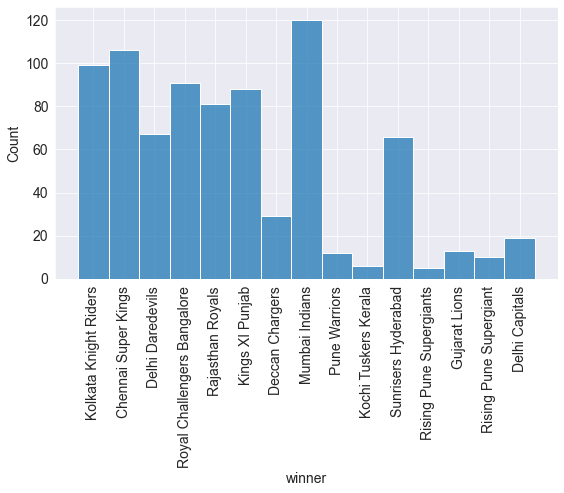

In [27]:
#histogram of number of matches won
sns.histplot(x=df.winner)
plt.xticks(rotation=90);

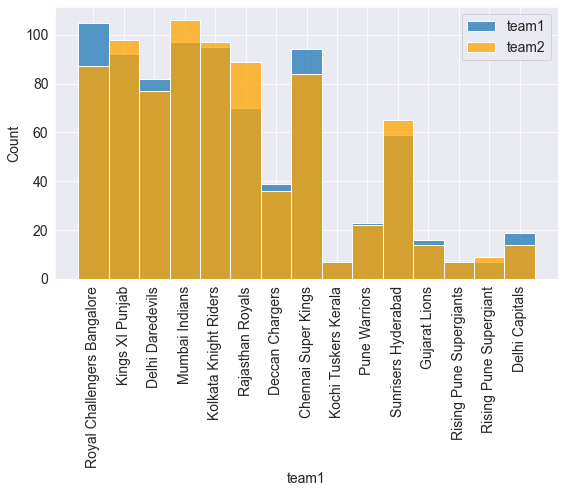

In [28]:
#histogram of matches played by the teams
sns.histplot(x=df.team1)
sns.histplot(x=df.team2, color='orange')
plt.xticks(rotation=90)
plt.legend(['team1','team2']);

Here we can see the comparative relationship between the number of matches won by each team and the histogram of matches played by each team. The reason some teams show lesser winning rate because they are haven't been playing for a long time.

**TODO** - Using barplot to see the relationship between the attributes.

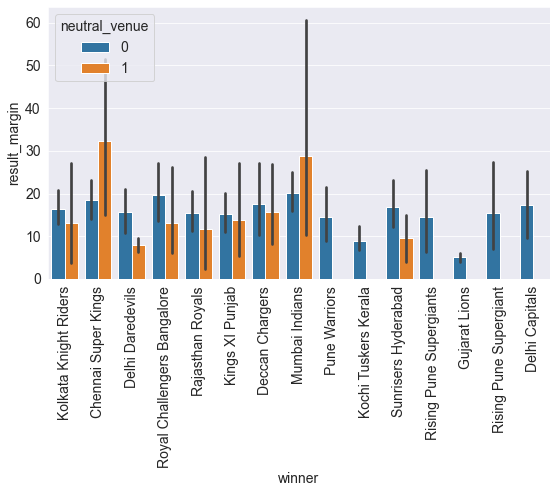

In [29]:
sns.barplot(x='winner', y='result_margin', hue='neutral_venue', data=df)
plt.xticks(rotation=90);

`Chennai Super Kings` and `Mumbai Indians` these are the only two teams which performed well in neutral condtions than in non-nuetral conditions.

**TODO** - Proportion of winning in each year

Year : 2008


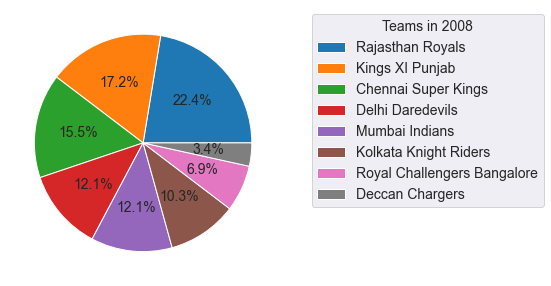

Year : 2009


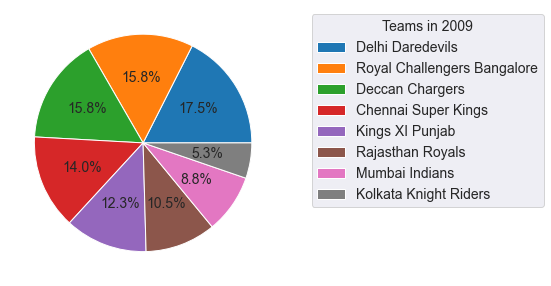

Year : 2010


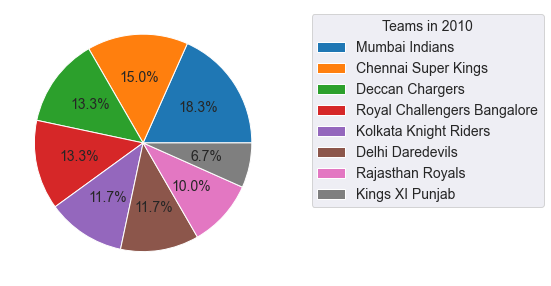

Year : 2011


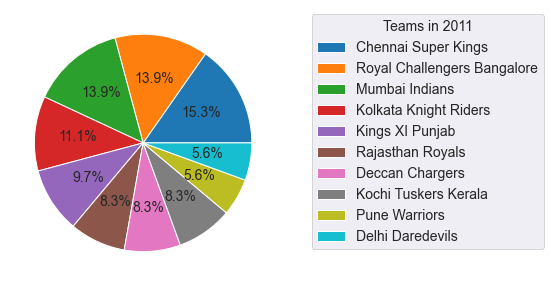

Year : 2012


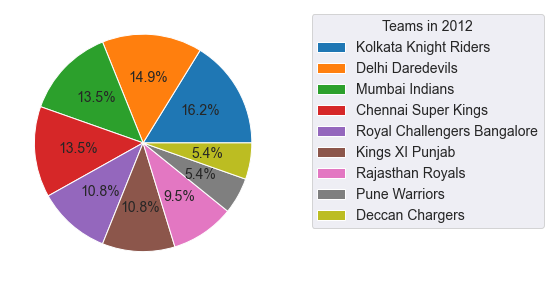

Year : 2013


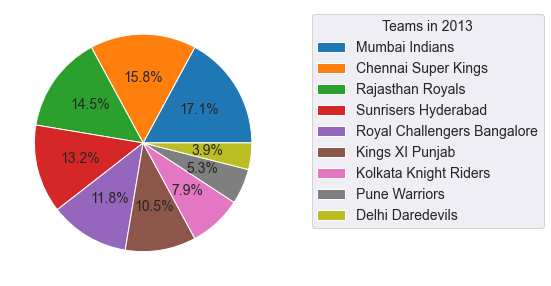

Year : 2014


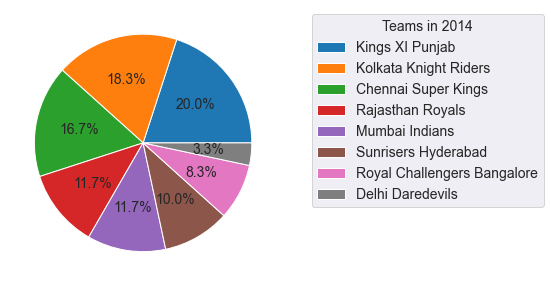

Year : 2015


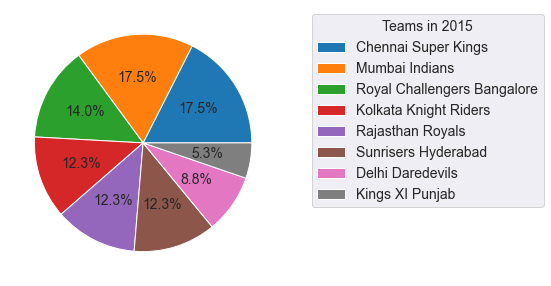

Year : 2016


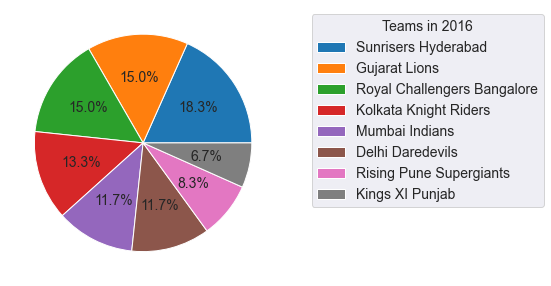

Year : 2017


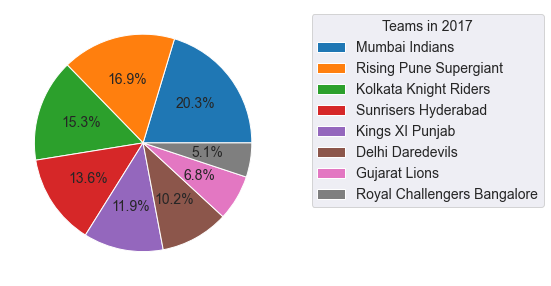

Year : 2018


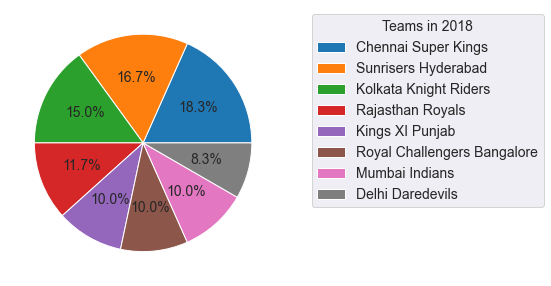

Year : 2019


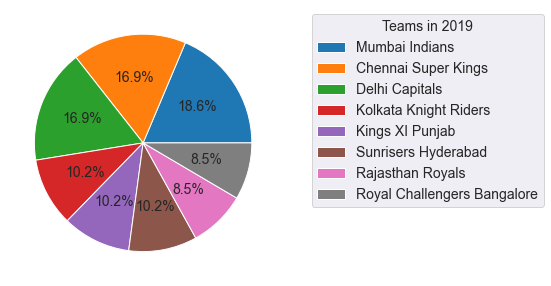

Year : 2020


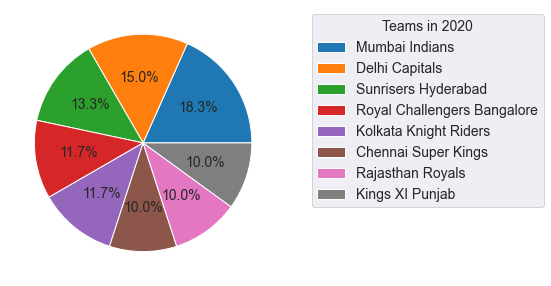

In [30]:
for i in df.year.unique():
    print("Year :", i)
    xdf=df[df.year==i]
    plt.pie(xdf.winner.value_counts(),autopct="%1.1f%%" )
    plt.legend(xdf.winner.value_counts().index,bbox_to_anchor=(2,1),loc='upper right', title='Teams in {}'.format(i))
    plt.show();

We can easily see which teams have won most and least matches in each year.

Let us save and upload our work to Jovian before continuing

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

## Asking and Answering Questions
Asking questions to derive insights from the data is an essential process. In here I have asked relevent questions to my data and tried to find there answer using python which will eventually lead me to some meaningful insights.

#### Q1: Does playing on the homeground has any  advantages?

Here homeground refers to the ground in the city which the team represents. When the venue is non-neutral the match is organized in homeground of `team1`. We will check if the same team wins the game or not.

In [33]:
l=0
xdf=df[df.neutral_venue==0]
for i,j in zip(xdf.team1, xdf.winner):
    if i==j:
        l=l+1

In [34]:
print('Total wins in the by the teams when the match is being played in their homeground :', l)

Total wins in the by the teams when the match is being played in their homeground : 406


In [35]:
p=len(xdf.winner)
print('The probability of winning the match if it is been played in the homeground :',(l/p))

The probability of winning the match if it is been played in the homeground : 0.5523809523809524


Therefore the teams have very slight advantage if the match is being in their homeground.

#### Q2: What is the effect of toss factor on the match?

In [36]:
xdf=df[df.toss_winner==df.winner]
len(xdf)/len(df)

0.5147783251231527

It doesn't seem that toss factor much in here.
Let's see if does matter whether you are choosing fielding or batting after winning the toss. 

In [37]:
am=df.groupby('toss_decision',as_index=False)['toss_winner'].value_counts()
am

,toss_decision,toss_winner,count
0,bat,Chennai Super Kings,51
1,bat,Mumbai Indians,48
2,bat,Kolkata Knight Riders,34
3,bat,Rajasthan Royals,34
4,bat,Delhi Daredevils,28
5,bat,Kings XI Punjab,27
6,bat,Royal Challengers Bangalore,24
7,bat,Sunrisers Hyderabad,24
8,bat,Deccan Chargers,24
9,bat,Pune Warriors,11


In [38]:
xdf=df[df.toss_winner==df.winner]
wm=xdf.groupby('toss_decision',as_index=False)['toss_winner'].value_counts()
wm

,toss_decision,toss_winner,count
0,bat,Chennai Super Kings,31
1,bat,Mumbai Indians,27
2,bat,Kolkata Knight Riders,17
3,bat,Rajasthan Royals,15
4,bat,Royal Challengers Bangalore,11
5,bat,Deccan Chargers,11
6,bat,Delhi Daredevils,11
7,bat,Sunrisers Hyderabad,10
8,bat,Kings XI Punjab,6
9,bat,Pune Warriors,3


In [39]:
#using top values for comparison
print('Chances of winning if you chose to bat first :',wm['count'][0]/am['count'][0])
print('Chances of winning if you chose to field first :',wm['count'][11]/am['count'][14])

Chances of winning if you chose to bat first : 0.6078431372549019
Chances of winning if you chose to field first : 0.59375


Since chances of winning after choosing to field or bat are almost equal, the winning factor seems totally independent of the toss.

#### Q3: Who has won the most player of the match awards and for which team?

In [40]:
xdf=df.groupby('winner',as_index=False)['player_of_match'].value_counts()
xdf[xdf['count']==xdf['count'].max()]

,winner,player_of_match,count
289,Royal Challengers Bangalore,AB de Villiers,21


`AB de Villiers` has won the most player of the match awards for `Royal Challengers Banglore`

#### Q4:Which team has won most matches in particular ground?

In [41]:
xdf=df.groupby('winner',as_index=False)['venue'].value_counts()

In [42]:
for i in list(xdf.winner.unique()):
    print(xdf[xdf['winner']==i].iloc[0])
    print('__'*50)

winner                Chennai Super Kings
venue     MA Chidambaram Stadium, Chepauk
count                                  40
Name: 0, dtype: object
____________________________________________________________________________________________________
winner     Deccan Chargers
venue     Barabati Stadium
count                    3
Name: 25, dtype: object
____________________________________________________________________________________________________
winner      Delhi Capitals
venue     Feroz Shah Kotla
count                    4
Name: 41, dtype: object
____________________________________________________________________________________________________
winner    Delhi Daredevils
venue     Feroz Shah Kotla
count                   27
Name: 51, dtype: object
____________________________________________________________________________________________________
winner                             Gujarat Lions
venue     Saurashtra Cricket Association Stadium
count                             

The above chart gives the name of the team and most matches won by them in a particular stadium. It seems that they have won their most matches in their homeground but it doesn't imply that the chances of winning are high in the homeground cause half of the matches played by each team are played in their homeground only.

#### Q5: Which of the two teams are best defender and best chaser?

Defender are the ones who chose to bat first and chaser are the ones who chose to ball first.

In [43]:
xdf=df[df.toss_decision=='field']
xdf[xdf.winner==xdf.toss_winner]['winner'].value_counts().head(1)

Kolkata Knight Riders    38
Name: winner, dtype: int64

In [44]:
xdf=df[df.toss_decision=='bat']
xdf[xdf.winner==xdf.toss_winner]['winner'].value_counts().head(1)

Chennai Super Kings    31
Name: winner, dtype: int64

`Kolkata Knight Riders` has recorded most number of successful chases whereas `Chennai Super Kings` has defended the score most times.

Let us save and upload our work to Jovian before continuing.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

## Inferences and Conclusion
From the analysis performed above we can conclude following things:
1. Toss factor doesn't matter much for a game.
2. Performance of the team doesn't depend whether they are playing their homeground or not.
3. `Mumbai Indians` and `Chennai Super Kings` are the only teams which performed better in neutral venue than non-neutral venue.
4. `AB de Villiers` has won most player of the match awards for RCB, he is their Most Valuable Player `MVP`.
5. `Kolktata Knight Riders` are the best chasers and `Chennai Super Kings` are best defenders.

Things I learned:
1. I learned to use pandas for manipulation of data.
2. Learned to do visualiazation using seaborn and matplotlib.
3. Asked and answered various questions related to the data with minimal efforts using pandas.

In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

## References and Future Work
I would further like to analyze which of these factors are more significant. Also, I will try to find the co-dependance of this factors.  
I took help of the following resources wherever I felt I needed:
1. Pandas : https://pandas.pydata.org/
2. Seaborn : https://seaborn.pydata.org/
3. Matplotlib : https://matplotlib.org/

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "prasadposture121/data-analysis-of-ipl-matches" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches


'https://jovian.ai/prasadposture121/data-analysis-of-ipl-matches'

The End